In [20]:
from bs4 import BeautifulSoup
import urllib
import requests 

url = "http://artflsrv02.uchicago.edu/cgi-bin/philologic/getobject.pl?c.4:1252.encyclopedie0416.6483542"
raw = requests.get(url)

encoding = raw.encoding if 'charset' in r.headers.get('content-type', '').lower() else None
soup = BeautifulSoup(raw.content, from_encoding=encoding)

text = soup.get_text()
print text



ARTFL Encyclopédie Search Results



<!--
/* The following is PhiloLogic specific CSS to handle TEI encoding */
/* Edit as you see fit, but you will probably need to modify traps in */
/* philosubs.pl in the database lib/ directory.  Yes, indeed, it is */
/* a bit fiddly.  One day, XSLT!  If you do it, please let us know. */
span.emph {font-weight: bolder; }
span.emphsc {FONT-SIZE: 12px;}
span.hi   {font-weight: bolder;}
span.foreign {font-style: italic;}
span.bibl {font-style: italic;}
span.title     {font-style: italic;}
span.hiitalic  {font-style: italic;}
span.hiunderline {text-decoration: underline;}
span.hibold   {font-weight: bolder;}
span.doctitle {display: block; text-align: center; FONT-SIZE: 24px; LINE-HEIGHT: 1.5;}
span.byline {display: block; text-align: center; FONT-SIZE: 16px; LINE-HEIGHT: 1.5;}
span.pubplace {display: block; text-align: center; FONT-SIZE: 16px; LINE-HEIGHT: 1.5;}
span.docedition {display: block; text-align: center; FONT-SIZE: 16px; LINE-HEIGHT: 1.5;}


In [56]:
start = "(Page 5:635)"
end = "-- 5:649 --  [page image]"

text_sub = text.split(start)[-1].split(end)[0]
print(text_sub)






* ENCYCLOPÉDIE, s. f. (Philosoph.) Ce mot signifie 
enchaînement de connoissances; il est composé
de la préposition greque ἐν, en, & des substantifs
κύκλος, cercle, & παιδεία, connoissance.

En effet, le but d'une Encyclopédie est de rassembler 
les connoissances éparses sur la surface de la terre;
d'en exposer le système général aux hommes avec
qui nous vivons, & de le transmettre aux hommes
qui viendront après nous; afin que les travaux des
siecles passés n'aient pas été des travaux inutiles pour
les siecles qui succéderont; que nos neveux, devenant 
plus instruits, deviennent en même tems plus
vertueux & plus heureux, & que nous ne mourions
pas sans avoir bien mérité du genre humain.

Il eût été difficile de se proposer un objet plus
étendu que celui de traiter de tout ce qui a rapport 
à la curiosité de l'homme, à ses devoirs, à ses
besoins, & à ses plaisirs. Aussi quelques personnes
accoutumées à juger de la possibilité d'une entreprise,
sur le peu de ressources qu'elles appe

In [235]:
from nltk.tokenize import sent_tokenize

text_sub__sents = sent_tokenize(text_sub)

print(len(text_sub__sents))

1037


In [236]:
print(text_sub__sents)[103]

Et comment étoit - il possible qu'elles se fissent?


In [232]:
tokens_freqdist = FreqDist(tokens)
tokens_freqdist.tabulate(10)

  de   la  les    à  que  des   le  qui   il   un 
1488  958  900  711  609  599  564  534  500  410 


In [233]:
from nltk.corpus import stopwords

tokens_filtered = [word for word in tokens if word not in stopwords.words('french')]
tokens_filtered_freqdist = FreqDist(tokens_filtered)
tokens_filtered_freqdist.tabulate(10)

  les  plus     a    si  tout  sans point    où comme cette 
  900   291   217   158   122   114   114    92    90    87 


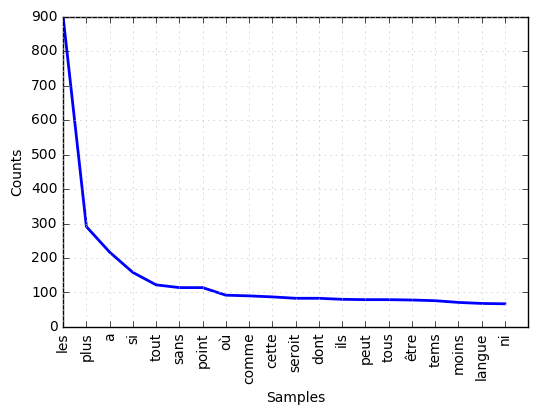

In [247]:
tokens_filtered_text = Text(tokens_filtered)
tokens_filtered_text.plot(20)

In [195]:
from nltk.util import ngrams

def make_ngrams(input_list, n):
  return zip(*[input_list[i:] for i in range(n)])

tetragrams = FreqDist(make_ngrams(tokens, 4))

tetragrams_top = [i[0] for i in tetragrams.most_common(10)]
for tetra in tetragrams_top:
    print tetra[0], tetra[1], tetra[2], tetra[3]

 il y a des
de la connoissance humaine
un dictionnaire universel raisonné
ce y a de
il y en a
tout ce qui est
des gens de lettres
de jour en jour
ainsi de suite ce
organes de la parole


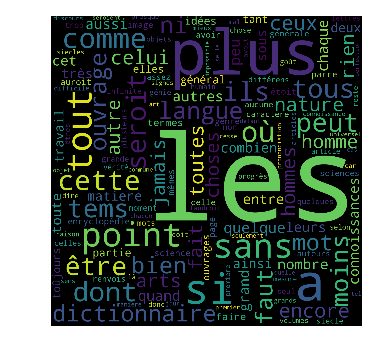

In [191]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1500,height=1500, max_words=150,relative_scaling=.7,normalize_plurals=False).generate_from_frequencies(tokens_filtered_freqdist)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
